In [12]:
import pandas as pd
import torch
import networkx as nx
from torch_geometric.data import Data
from scipy.spatial import cKDTree
import os


In [13]:
df = pd.read_csv(r"C:\Users\purav\OneDrive\Desktop\Fi Year Project\Final-Year-Project\Data\Processed\climate_data.csv")

In [14]:
df.head()

,year,latitude,longitude,rainfall,temperature
0,2000,8.451258,76.834814,3.872830,30.760159
1,2000,8.733465,76.608342,4.931191,30.760159
2,2000,8.631885,76.770510,5.135038,30.760159
3,2000,8.885523,76.547012,6.002698,30.760159
4,2000,8.858651,76.733590,5.135038,30.760159


In [15]:
graphs = {}

In [16]:
years = df['year'].unique()


In [17]:
import numpy as np

graphs = {}

for year in years:
    print(f"Processing year {year}...")

    df_year = df[df['year'] == year]
    node_features = torch.tensor(df_year[['rainfall', 'temperature']].values, dtype=torch.float)
    node_positions = df_year[['latitude', 'longitude']].values
    
    kdtree = cKDTree(node_positions)
    edges = kdtree.query(node_positions, k=9)[1]  

    edge_index = []
    edge_features = []

    for i, neighbors in enumerate(edges):
        for neighbor in neighbors:
            if i != neighbor:
                edge_index.append((i, neighbor))
                
                dist = np.linalg.norm(node_positions[i] - node_positions[neighbor])  
                rainfall_diff = abs(node_features[i][0] - node_features[neighbor][0])  
                temperature_diff = abs(node_features[i][1] - node_features[neighbor][1]) 
                
                edge_features.append([dist, rainfall_diff, temperature_diff])

    edge_index = torch.tensor(edge_index, dtype=torch.long).t().contiguous()
    edge_attr = torch.tensor(edge_features, dtype=torch.float)

    graph = Data(x=node_features, edge_index=edge_index, edge_attr=edge_attr)
    graphs[year] = graph

    os.makedirs("processed_graphs", exist_ok=True)
    torch.save(graph, f"processed_graphs/graph_{year}.pt")

print("Graph processing complete with edge features!")


Processing year 2000...
Processing year 2001...
Processing year 2002...
Processing year 2003...
Processing year 2004...
Processing year 2005...
Processing year 2006...
Processing year 2007...
Processing year 2008...
Processing year 2009...
Processing year 2010...
Processing year 2011...
Processing year 2012...
Processing year 2013...
Processing year 2014...
Processing year 2015...
Processing year 2016...
Processing year 2017...
Processing year 2018...
Processing year 2019...
Processing year 2020...
Processing year 2021...
Processing year 2022...
Processing year 2023...
Graph processing complete with edge features!


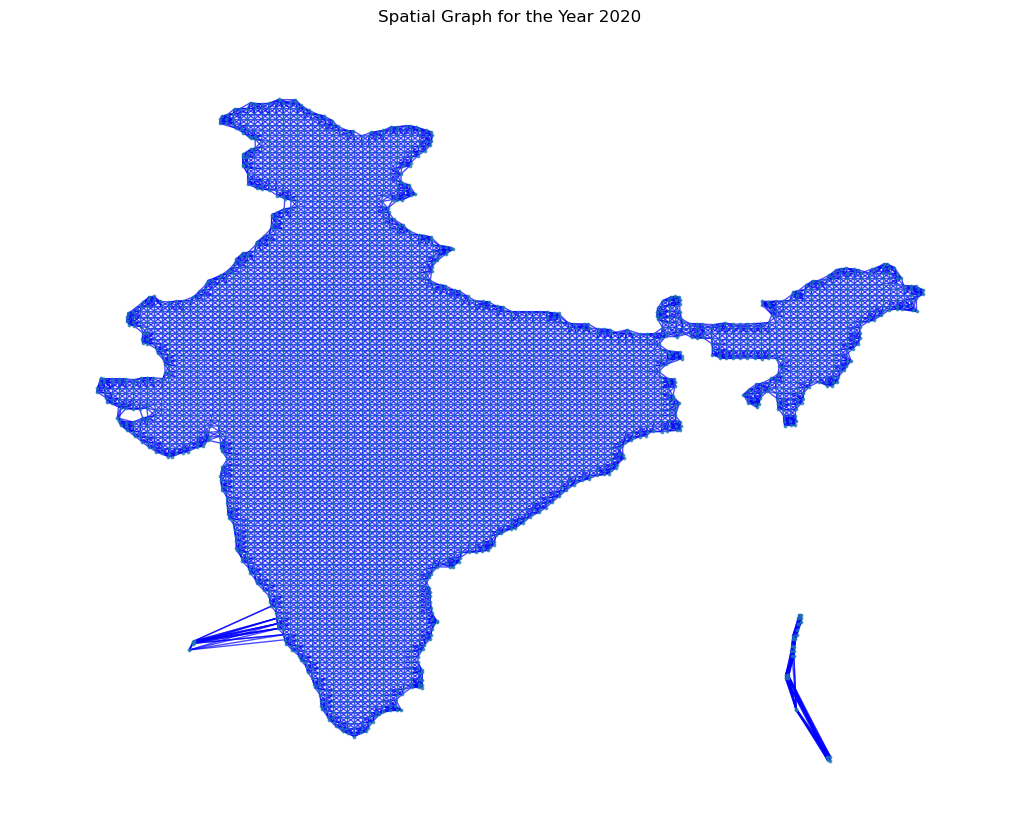

In [18]:
import matplotlib.pyplot as plt
import networkx as nx
import torch

# Load the graph for the year 2020
graph_2020 = torch.load("processed_graphs/graph_2020.pt")

# Convert edge index to a NetworkX graph
G = nx.Graph()
edge_index = graph_2020.edge_index.numpy().T
G.add_edges_from(edge_index)

# Extract node positions from the dataset
df_year = df[df['year'] == 2020]
positions = {i: (df_year.iloc[i]['longitude'], df_year.iloc[i]['latitude']) for i in range(len(df_year))}

# Plot the graph
plt.figure(figsize=(10, 8))
nx.draw(G, pos=positions, node_size=3, edge_color="blue", alpha = 0.7)
plt.title("Spatial Graph for the Year 2020")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.show()
